# Importing Relevant Packages and Datasets

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [120]:
choice_95 = pd.DataFrame(pd.read_csv('data/choice_95.csv'))
win_95 = pd.DataFrame(pd.read_csv('data/wi_95.csv'))
loss_95 = pd.DataFrame(pd.read_csv('data/lo_95.csv'))

choice_100 = pd.DataFrame(pd.read_csv('data/choice_100.csv'))
win_100 = pd.DataFrame(pd.read_csv('data/wi_100.csv'))
loss_100 = pd.DataFrame(pd.read_csv('data/lo_100.csv'))

choice_150 = pd.DataFrame(pd.read_csv('data/choice_150.csv'))
win_150 = pd.DataFrame(pd.read_csv('data/wi_150.csv'))
loss_150 = pd.DataFrame(pd.read_csv('data/lo_150.csv'))

# Assigning Variables for Net Profit/Loss and Count and visualising them

In [121]:
profit_loss = []
count = []
for dataset in [choice_95, choice_100, choice_150]:
    if dataset.all == choice_95.all:
        win_dataset = win_95
        loss_dataset = loss_95
    elif dataset.all == choice_100.all:
        win_dataset = win_100
        loss_dataset = loss_100
    elif dataset.all == choice_150.all:
        win_dataset = win_150
        loss_dataset = loss_150
    else:
        print("Broken dataset")
    for subject in range(0, len(dataset.iloc[:,0])):
        ones_pl = 0
        twos_pl = 0
        threes_pl = 0
        fours_pl = 0
        ones_chosen = 0
        twos_chosen = 0
        threes_chosen = 0
        fours_chosen = 0
        for round in range(0,len(dataset.iloc[0])):
            choice = dataset.iloc[subject][round]
            win = win_dataset.iloc[subject][round]
            loss = loss_dataset.iloc[subject][round]
            if choice == 1:
                ones_chosen += 1
                ones_pl += (win + loss)
            elif choice == 2:
                twos_chosen += 1
                twos_pl += (win + loss)
            elif choice == 3:
                threes_chosen += 1
                threes_pl += (win + loss)
            elif choice == 4:
                fours_chosen += 1
                fours_pl += (win + loss)
        profit_loss.append([ones_pl, twos_pl, threes_pl, fours_pl])
        count.append([ones_chosen/len(dataset.iloc[0]), 
                      twos_chosen/len(dataset.iloc[0]), 
                      threes_chosen/len(dataset.iloc[0]), 
                      fours_chosen/len(dataset.iloc[0])])

In [122]:
my_list = []
for subject in range(0,len(profit_loss)):
    for choice in range(0,4):
        my_list.append([profit_loss[subject][choice],count[subject][choice]])
my_array = np.array(my_list)

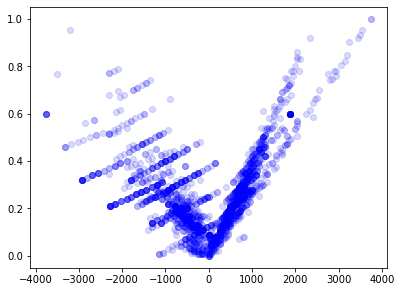

In [124]:
# plot the data points
plt.scatter(
   my_array[:, 0], my_array[:, 1],
   c='blue', alpha = 0.15
)

# Creating 4 Clusters

In [125]:
kmeans = KMeans(
    n_clusters=4, init='random',
    n_init=1, 
    tol=1e-04, random_state=2
)

In [126]:
y_km = kmeans.fit_predict(my_array)

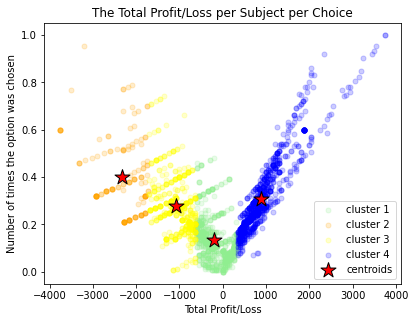

In [127]:
# plot the 4 clusters
plt.scatter(
    my_array[y_km == 0, 0], my_array[y_km == 0, 1],
    s=25, c='lightgreen',
    marker='o', alpha = 0.2,
    label='cluster 1'
)

plt.scatter(
    my_array[y_km == 1, 0], my_array[y_km == 1, 1],
    s=25, c='orange',
    marker='o', alpha = 0.2,
    label='cluster 2'
)

plt.scatter(
    my_array[y_km == 2, 0], my_array[y_km == 2, 1],
    s=25, c='yellow',
    marker='o', alpha = 0.2,
    label='cluster 3'
)

plt.scatter(
    my_array[y_km == 3, 0], my_array[y_km == 3, 1],
    s=25, c='blue',
    marker='o', alpha = 0.2,
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.title("The Total Profit/Loss per Subject per Choice")
plt.xlabel("Total Profit/Loss")
plt.ylabel("Number of times the option was chosen")
plt.legend(scatterpoints=1)

# Exploring the best values for K-Means

In [140]:
kmeans = KMeans(
    n_clusters=4, init='random',
    n_init=1, max_iter = 300,
)

In [141]:
y_km = kmeans.fit_predict(my_array)

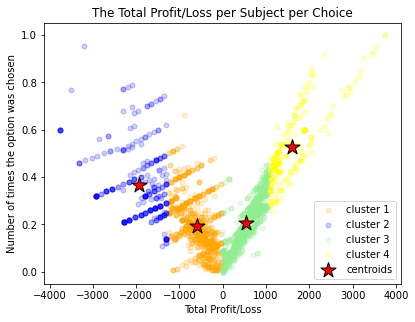

In [143]:
# plot the 4 clusters
plt.scatter(
    my_array[y_km == 0, 0], my_array[y_km == 0, 1],
    s=25, c='orange',
    marker='o', alpha = 0.2,
    label='cluster 1'
)

plt.scatter(
    my_array[y_km == 1, 0], my_array[y_km == 1, 1],
    s=25, c='blue',
    marker='o', alpha = 0.2,
    label='cluster 2'
)

plt.scatter(
    my_array[y_km == 2, 0], my_array[y_km == 2, 1],
    s=25, c='lightgreen',
    marker='o', alpha = 0.2,
    label='cluster 3'
)

plt.scatter(
    my_array[y_km == 3, 0], my_array[y_km == 3, 1],
    s=25, c='yellow',
    marker='o', alpha = 0.2,
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.title("The Total Profit/Loss per Subject per Choice")
plt.xlabel("Total Profit/Loss")
plt.ylabel("Number of times the option was chosen")
plt.legend(scatterpoints=1)

# Comparing clustering algorithm to the original choices

In [131]:
option = [1,2,3,4]*(len(profit_loss))
option_array = np.array(option)

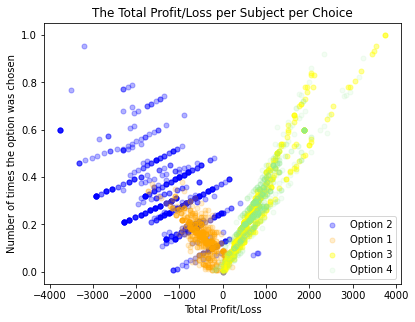

In [145]:
# plot the 4 clusters

plt.scatter(
    my_array[option_array == 2, 0], my_array[option_array == 2, 1],
    s=25, alpha=0.3, c='blue',
    marker='o',
    label='Option 2'
)

plt.scatter(
    my_array[option_array == 1, 0], my_array[option_array == 1, 1],
    s=25, alpha=0.2, c='orange',
    marker='o',
    label='Option 1'
)

plt.scatter(
    my_array[option_array == 3, 0], my_array[option_array == 3, 1],
    s=25, alpha=0.4, c='yellow',
    marker='o',
    label='Option 3'
)

plt.scatter(
    my_array[option_array == 4, 0], my_array[option_array == 4, 1],
    s=25, alpha=0.1, c='lightgreen',
    marker='o',
    label='Option 4'
)

plt.title("The Total Profit/Loss per Subject per Choice")
plt.xlabel("Total Profit/Loss")
plt.ylabel("Number of times the option was chosen")
plt.legend(scatterpoints=1)